In [27]:
import numpy as np
import pandas as pd
import utm
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats

# Determining whether bike theft is related to the weather of the day

In [2]:
crimeData = pd.read_csv("clean_bike_data.csv")
crimeData.head(8)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME
0,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,49.268399,-123.172906,2003-01-01 00:00:00
1,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,49.279617,-123.106816,2003-01-01 00:00:00
2,Theft of Bicycle,2003,1,1,0,5,11XX HORNBY ST,Central Business District,49.278700,-123.127790,2003-01-01 00:05:00
3,Theft of Bicycle,2003,1,1,13,30,X NK_LOC ST,NaN,49.281843,-123.099582,2003-01-01 13:30:00
4,Theft of Bicycle,2003,1,2,1,0,10XX JERVIS ST,West End,49.284857,-123.131873,2003-01-02 01:00:00
5,Theft of Bicycle,2003,1,3,0,19,2XX N TEMPLETON DR,Grandview-Woodland,49.286784,-123.059743,2003-01-03 00:19:00
6,Theft of Bicycle,2003,1,3,20,0,20XX MAPLE ST,Kitsilano,49.267402,-123.150350,2003-01-03 20:00:00
7,Theft of Bicycle,2003,1,4,3,30,10XX W 14TH AVE,Fairview,49.258707,-123.128553,2003-01-04 03:30:00


In [3]:
weatherData = pd.read_csv("cleanedWeatherData.csv", parse_dates = ["DATE/TIME"])
weatherData = weatherData.drop(["DATE/TIME","MINUTE"], axis=1)
weatherData.head(8)

,YEAR,MONTH,DAY,HOUR,WEATHER,DATE,WEATHERCOND
0,2016,1,1,1,Clear,2016-01-01,Good
1,2016,1,1,4,Clear,2016-01-01,Good
2,2016,1,1,7,Clear,2016-01-01,Good
3,2016,1,1,10,Clear,2016-01-01,Good
4,2016,1,1,13,Clear,2016-01-01,Good
5,2016,1,1,16,Clear,2016-01-01,Good
6,2016,1,1,19,Clear,2016-01-01,Good
7,2016,1,1,22,Clear,2016-01-01,Good


# Merging crime and weather data by year, month, day and hour

In [4]:
crimeDataWithWeather = pd.merge(crimeData, weatherData,  how='inner', on=['YEAR','MONTH','DAY', 'HOUR'])
crimeDataWithWeather = crimeDataWithWeather.drop(["TYPE", "LAT", "LON", "DATE"], axis=1)
crimeDataWithWeather.head(8)

,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,DATETIME,WEATHER,WEATHERCOND
0,2016,1,1,1,0,X W PENDER ST,Central Business District,2016-01-01 01:00:00,Clear,Good
1,2016,1,1,13,0,20XX YUKON ST,Mount Pleasant,2016-01-01 13:00:00,Clear,Good
2,2016,1,1,13,15,11XX GILFORD ST,West End,2016-01-01 13:15:00,Clear,Good
3,2016,1,2,12,45,ALBERNI ST / DENMAN ST,West End,2016-01-02 12:45:00,Fog,Bad
4,2016,1,3,13,0,12XX HOWE ST,Central Business District,2016-01-03 13:00:00,Mainly Clear,Good
5,2016,1,4,7,0,3XX TERMINAL AVE,Strathcona,2016-01-04 07:00:00,Snow,Bad
6,2016,1,5,6,40,10XX PACIFIC ST,West End,2016-01-05 06:40:00,"Rain,Snow",Bad
7,2016,1,5,7,10,13XX HOWE ST,Central Business District,2016-01-05 07:10:00,Rain,Bad


# Distribution of the bike theft for each weather type

In [5]:
crimeDataWithWeather["WEATHER"].value_counts()

Mainly Clear                 724
Mostly Cloudy                665
Cloudy                       612
Rain                         583
Clear                        374
Rain Showers                 128
Rain,Fog                      46
Fog                           42
Smoke                         33
Moderate Rain                 20
Snow                          15
Drizzle,Fog                   11
Moderate Rain,Fog              8
Drizzle                        8
Rain,Snow                      5
Haze                           5
Rain,Drizzle,Fog               4
Moderate Rain Showers          3
Heavy Rain,Fog                 2
Heavy Rain                     2
Thunderstorms                  1
Rain,Drizzle                   1
Snow,Fog                       1
Snow Showers                   1
Rain Showers,Snow Showers      1
Moderate Rain Showers,Fog      1
Rain,Snow,Fog                  1
Rain Showers,Fog               1
Name: WEATHER, dtype: int64

In [6]:
weatherTypeDist = crimeDataWithWeather[["WEATHER"]].groupby("WEATHER").size().reset_index(name='COUNT')
weatherTypeDist = weatherTypeDist.sort_values("COUNT").reset_index(drop=True)
weatherTypeDist.head(6)

,WEATHER,COUNT
0,Thunderstorms,1
1,"Rain,Drizzle",1
2,"Rain Showers,Snow Showers",1
3,"Rain Showers,Fog",1
4,"Snow,Fog",1
5,"Moderate Rain Showers,Fog",1


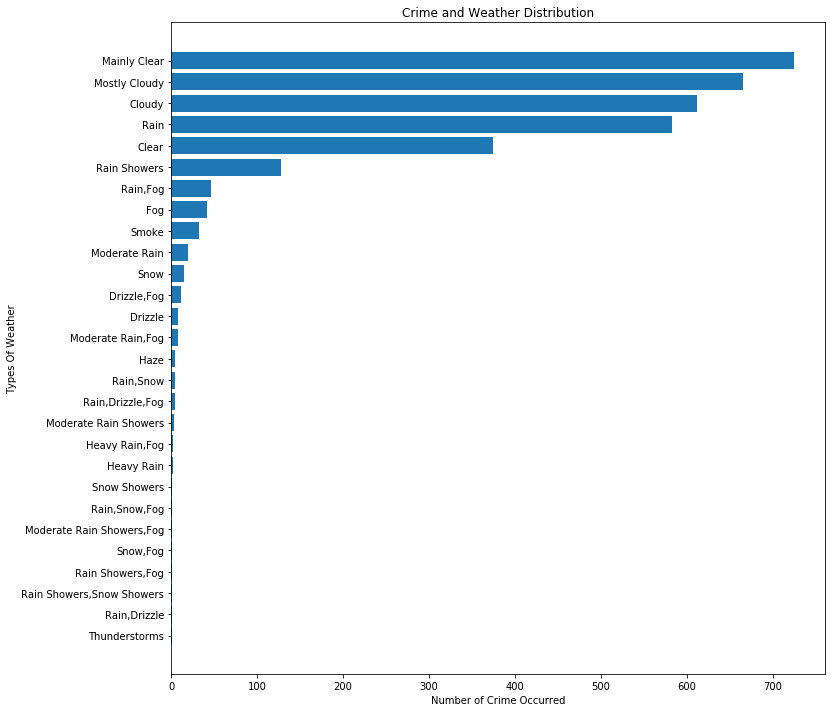

In [7]:
plt.figure(figsize=(10,10))
plt.title("Crime and Weather Distribution")
plt.ylabel("Types Of Weather")
plt.xlabel("Number of Crime Occurred")
plt.tight_layout()
plt.barh(weatherTypeDist["WEATHER"], weatherTypeDist["COUNT"])
plt.savefig("Crime and Weather Distribution1.png",dpi=300, bbox_inches = "tight")

# Distribution for the crime between the good and bad weather condition

In [8]:
weatherCond = crimeDataWithWeather[["WEATHERCOND"]].groupby("WEATHERCOND").size().reset_index(name='COUNT')
weatherCond = weatherCond.sort_values("COUNT").reset_index(drop=True)
weatherCond.head(6)

,WEATHERCOND,COUNT
0,Bad,923
1,Good,2375


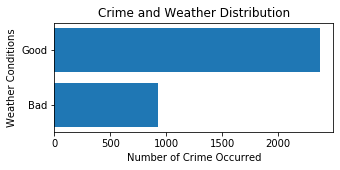

In [9]:
plt.figure(figsize=(5,2))
plt.title("Crime and Weather Distribution")
plt.xlabel("Number of Crime Occurred")
plt.ylabel("Weather Conditions")
plt.barh(weatherCond["WEATHERCOND"], weatherCond["COUNT"])
plt.savefig("Crime and Weather Distribution2.png",dpi=300, bbox_inches = "tight")

# Crime distribution over time for good weather

In [10]:
crimeGoodWeather = crimeDataWithWeather[crimeDataWithWeather["WEATHERCOND"] == "Good"]
crimeGoodWeather.head(5)

,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,DATETIME,WEATHER,WEATHERCOND
0,2016,1,1,1,0,X W PENDER ST,Central Business District,2016-01-01 01:00:00,Clear,Good
1,2016,1,1,13,0,20XX YUKON ST,Mount Pleasant,2016-01-01 13:00:00,Clear,Good
2,2016,1,1,13,15,11XX GILFORD ST,West End,2016-01-01 13:15:00,Clear,Good
4,2016,1,3,13,0,12XX HOWE ST,Central Business District,2016-01-03 13:00:00,Mainly Clear,Good
10,2016,1,5,22,0,9XX BURRARD ST,Central Business District,2016-01-05 22:00:00,Cloudy,Good


In [31]:
crimeGoodWeatherMonth = crimeGoodWeather.groupby("MONTH").size().reset_index(name='COUNT')
crimeGoodWeatherMonth.head()

,MONTH,COUNT
0,1,81
1,2,77
2,3,98
3,4,177
4,5,282


In [32]:
crimeBadWeather = crimeDataWithWeather[crimeDataWithWeather["WEATHERCOND"] == "Bad"]
crimeBadWeatherMonth = crimeBadWeather.groupby("MONTH").size().reset_index(name='COUNT')
crimeBadWeatherMonth.head()

,MONTH,COUNT
0,1,77
1,2,60
2,3,91
3,4,79
4,5,50


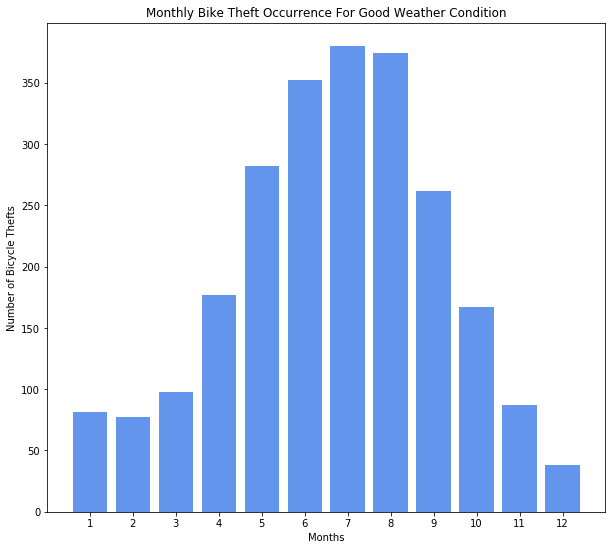

In [39]:
plt.figure(figsize=(10, 9))
plt.title("Monthly Bike Theft Occurrence For Good Weather Condition")
plt.xlabel("Months")
plt.ylabel("Number of Bicycle Thefts")
plt.xticks(crimeGoodWeatherMonth['MONTH'])
plt.bar(crimeGoodWeatherMonth['MONTH'], crimeGoodWeatherMonth['COUNT'], color='cornflowerblue')
plt.savefig("Good Weather.png")

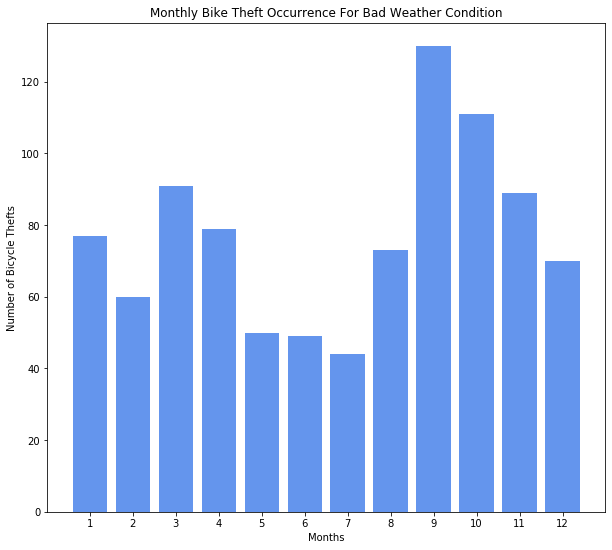

In [38]:
plt.figure(figsize=(10, 9))
plt.title("Monthly Bike Theft Occurrence For Bad Weather Condition")
plt.xlabel("Months")
plt.ylabel("Number of Bicycle Thefts")
plt.xticks(crimeBadWeatherMonth['MONTH'])
plt.bar(crimeBadWeatherMonth['MONTH'], crimeBadWeatherMonth['COUNT'], color='cornflowerblue')
plt.savefig("Bad Weather.png")

# Statistical test

### Normality

In [17]:
p_value = stats.normaltest(crimeGoodWeatherMonth["COUNT"]).pvalue
print("Good weather P_value: ", p_value)

p_value = stats.normaltest(crimeBadWeatherMonth["COUNT"]).pvalue
print("Bad weather P_value: ", p_value)

Good weather P_value:  0.1718304173475086
Bad weather P_value:  0.47530018284672704


Since the p-values are > 0.05, we can conclude that they are normally distributed

### T-test (One-tailed test)
<br>
Null hypothesis: mean of crime for good weather <= mean of crime for bad weather <br>
Alternative hypothesis: mean of crime for good weather > mean of crime for bad weather

In [24]:
ttest = stats.ttest_ind(crimeGoodWeatherMonth["COUNT"], crimeBadWeatherMonth["COUNT"])
print("T-test p_value: ", ttest.pvalue)
print("T-test statistic value: ", ttest.statistic)

T-test p_value:  0.003743215011102955
T-test statistic value:  3.2418894401992144


Since the p-value < 0.1 (=0.05*2), and the t-statistic > 0, we can conclude that mean of crime for good weather > mean of crime for bad weather <br>